# Visualizing Bayes Opt in 1d

# ACML2020 Tutorial: Recent Advances in Bayesian Optimization
# http://vu-nguyen.org/BayesOptTutorial_ACML20

# Dr Vu Nguyen vu@ieee.org


In [1]:
from mini_bo import BayesOpt,visualization,functions
import numpy as np
import matplotlib.pyplot as plt

# Running Bayesian Optimization

# Initialize the random points from Forrester function

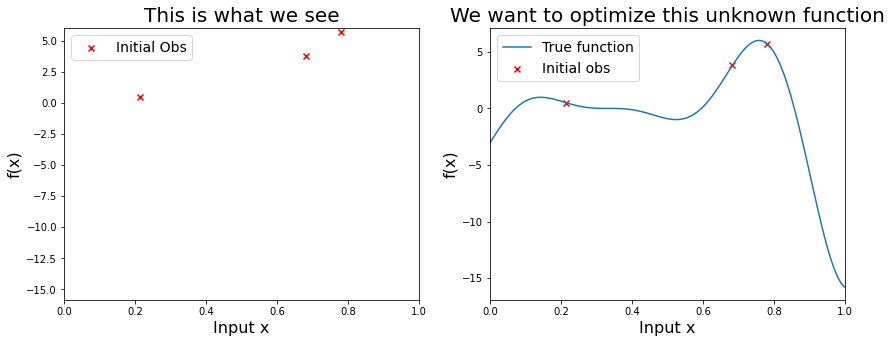

In [2]:
myfunction=functions.forrester(sd=0)

x0=np.random.uniform(0,1,3)
#x0=[0.1,0.46,0.91]
init_X=np.reshape(x0,(len(x0),1))
init_Y=myfunction.func(init_X)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,5))


x0=np.linspace(0,1,100)
y0=myfunction.func(x0)
ax2.plot(x0,y0,label="True function")
ax2.scatter(init_X,init_Y,color='red',marker='x',label="Initial obs")
ax2.set_xlabel("Input x",fontsize=16)
ax2.set_ylabel("f(x)",fontsize=16)
ax2.set_xlim(0,1)
ax2.set_title("We want to optimize this unknown function",fontsize=20)
ax2.legend(fontsize=14)


ax1.scatter(init_X,init_Y,color='red',marker='x',label="Initial Obs")
ax1.set_xlabel("Input x",fontsize=16)
ax1.set_ylabel("f(x)",fontsize=16)
ax1.set_xlim(0,1)
ax1.set_ylim(np.min(y0),np.max(y0))
ax1.set_title("This is what we see",fontsize=20)
ax1.legend(fontsize=14)


# Set up the BO class


In [3]:
# Specify the acquisition function
acq_name='ei' 
#acq_name='ucb'
bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

C:\Users\Lenovo\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Initialize BO using 3*dim number of observations

In [4]:
bo.init_with_data(init_X=init_X,init_Y=init_Y)

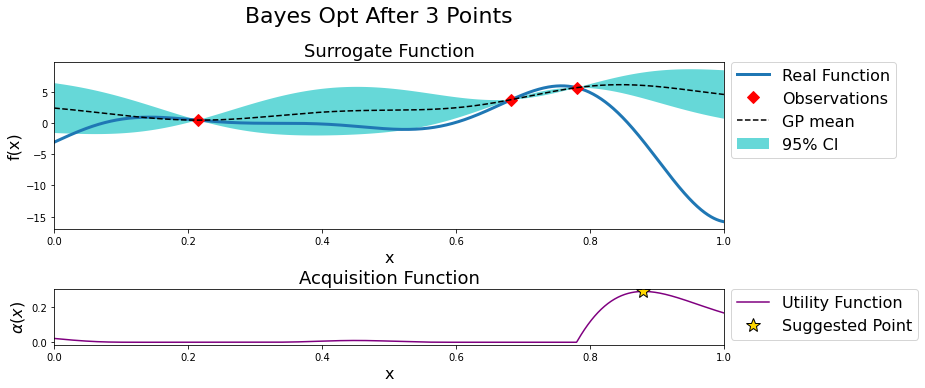

In [5]:
# alternatively, we can also call this function and give n_init
#bo.init(n_init_points=3)
visualization.plot_bo_1d(bo)

# Select the next point by maximizing the acquisition function

estimated lengthscale [0.01549023]
the next point is  [0.87988351]


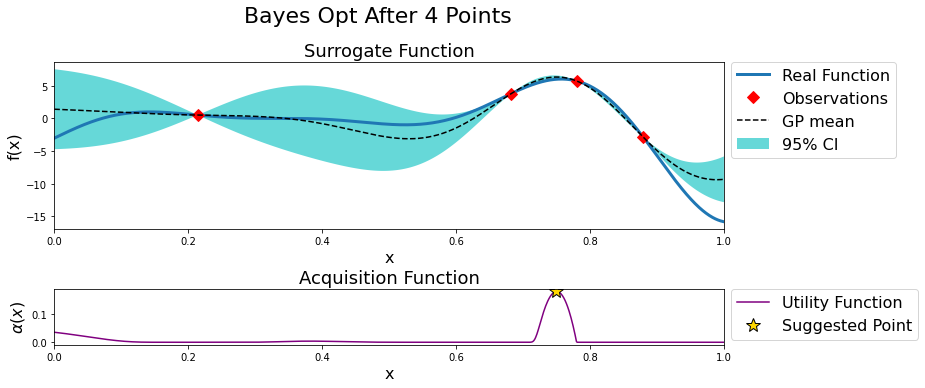

In [6]:
xt=bo.select_next_point()
print("the next point is ",xt)
visualization.plot_bo_1d(bo)

# Select the next point by maximizing the acquisition function

the next point is  [0.75015797]


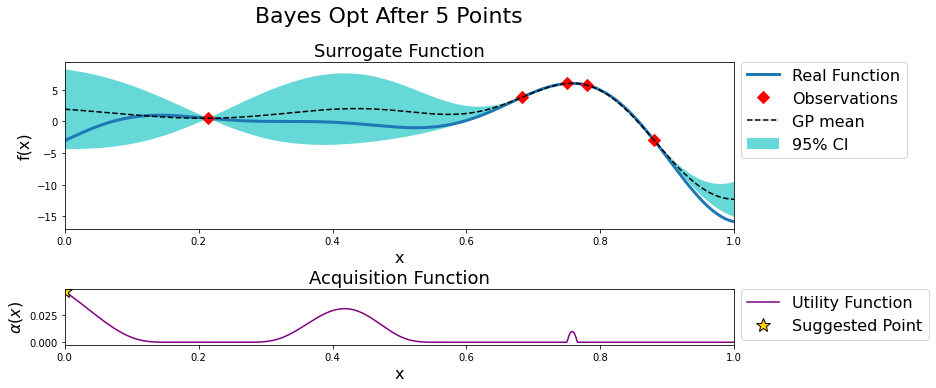

In [7]:
xt=bo.select_next_point()
print("the next point is ",xt)
visualization.plot_bo_1d(bo)

# Running three additional iterations

estimated lengthscale [0.00952196]


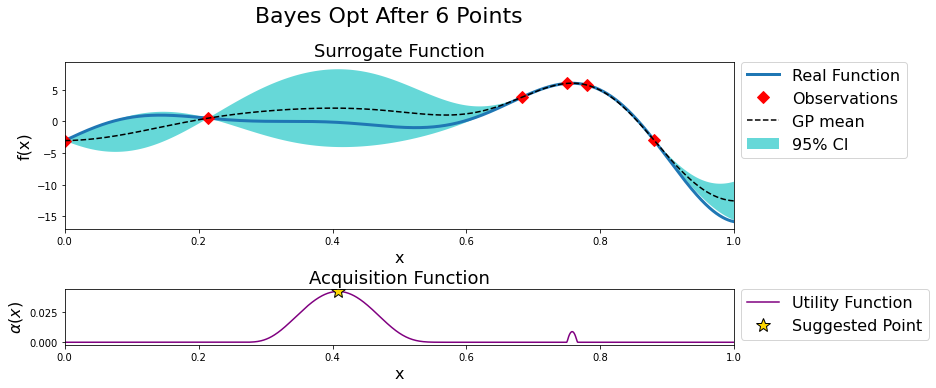

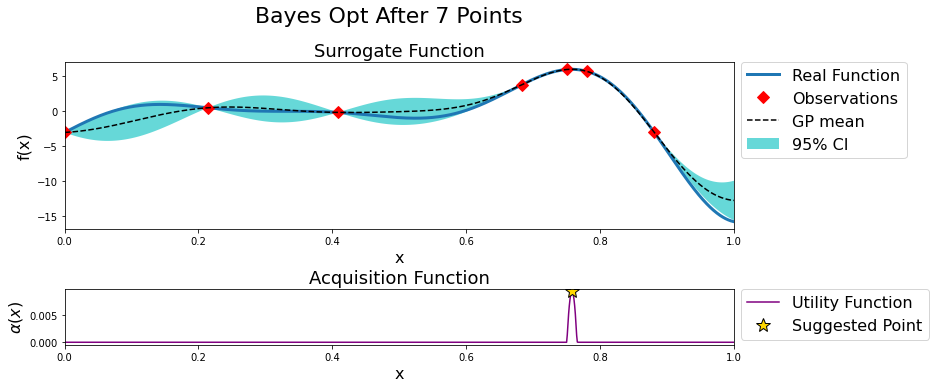

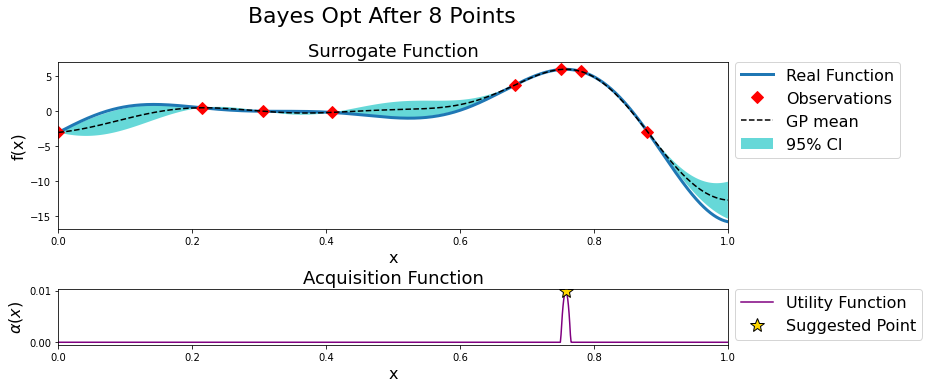

In [8]:
NN=3*myfunction.input_dim
for index in range(0,NN):
    xt=bo.select_next_point()
    visualization.plot_bo_1d(bo)

# Plot the optimization performance

Text(0.5, 1.0, 'Performance')

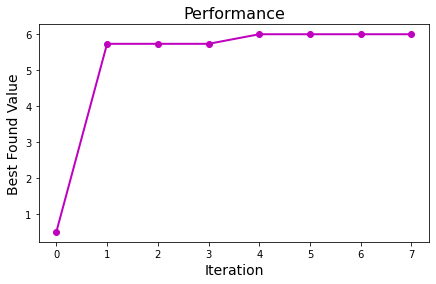

In [9]:
fig=plt.figure(figsize=(7, 4))
myYbest=[bo.Y_ori[:idx+1].max() for idx,val in enumerate(bo.Y_ori)]
plt.plot(range(len(myYbest)),myYbest,linewidth=2,color='m',linestyle='-',marker='o')

plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best Found Value',fontsize=14)
plt.title('Performance',fontsize=16)